<a href="https://colab.research.google.com/github/HughClaimsend/MA5851_HughMcMullan_A3/blob/main/MA5851_Hugh_McMullan_A3_Part3_Pre_processing_Posts_Text_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Import libraries needed for this notebook
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import re

import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
# The data files are located on the Google Drive, so do a drive.mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# Read in the DronePosts.csv data, created in the Part 1 notebook
dfDronePostsSince2018 = pd.read_csv('/content/drive/MyDrive/DronePostsSince2018_202112041100.csv')
display(dfDronePostsSince2018)

,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text
0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...
1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...
2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use..."
3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...
4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...
...,...,...,...,...,...,...
7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...
7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...
7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...
7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ..."


In [26]:
dfPreppedText = dfDronePostsSince2018
dfPreppedText['target_text'] = dfPreppedText['thread_name'] + " " + dfPreppedText['post_text']
display(dfPreppedText)

,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text
0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...
1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...
2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...
3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...
4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...
...,...,...,...,...,...,...,...
7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...
7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...
7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...
7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...


Drop any rows with null values

In [27]:
dfPreppedText = dfPreppedText.dropna()
dfPreppedText

,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text
0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...
1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...
2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...
3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...
4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...
...,...,...,...,...,...,...,...
7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...
7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...
7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...
7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...


In [28]:
dfPreppedText.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7667 entries, 0 to 7667
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       7667 non-null   int64 
 1   dronesite_group  7667 non-null   object
 2   thread_name      7667 non-null   object
 3   post_YYMM        7667 non-null   int64 
 4   post_YYYY        7667 non-null   int64 
 5   post_text        7667 non-null   object
 6   target_text      7667 non-null   object
dtypes: int64(3), object(4)
memory usage: 479.2+ KB


In [29]:
# NLTK constants
PATTERN_S = re.compile("\'s")           # matches `'s` from text
PATTERN_R = re.compile("\r")            #matches `\r`
PATTERN_N = re.compile("\n")            #matches `\r` and `\n`
PATTERN_PUNC = re.compile(r"[^\w\s]")   # matches all non 0-9 A-z whitespace
STOPWORDS = set(stopwords.words('english'))

In [30]:
# function for text cleaning 
def clean_text_using_nltk(text):
    text = text.lower()                     # Convert text to lowercase 

    text = re.sub(PATTERN_S, ' ', text)     # Remove apostrophe-s
    text = re.sub(PATTERN_R, ' ', text)     # Remove escaped \r characters
    text = re.sub(PATTERN_N, ' ', text)     # Remove escaped \n characters
    text = re.sub(PATTERN_PUNC, ' ', text)  # Remove non 0-9 A-z whitespace
    
    return text

# Apply the text cleaning function to the target_text
dfPreppedText['cleaned_text'] = dfPreppedText['target_text'].apply(lambda s: clean_text_using_nltk(s))
display(dfPreppedText)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text
0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...,latest casa newsletter re vlos latest casa ...
1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...,latest casa newsletter re vlos i m guessing th...
2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...,latest casa newsletter re vlos if it s like th...
3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...,latest casa newsletter re vlos casa is not try...
4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...,latest casa newsletter re vlos thispilothere...
...,...,...,...,...,...,...,...,...
7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone be intere...
7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle in 6k castel beseno is an i...
7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains and a stunning waterfal...
7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains and a stunning waterfal...


In [31]:
# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in STOPWORDS]
    return ' '.join(no_stopword_text)

# Apply the stopwords removal function to the corpus text
dfPreppedText['cleaned_text'] = dfPreppedText['cleaned_text'].apply(lambda s: remove_stopwords(s))
display(dfPreppedText)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text
0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...,latest casa newsletter vlos latest casa newsle...
1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...,latest casa newsletter vlos guessing making di...
2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...,latest casa newsletter vlos like us expectatio...
3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...,latest casa newsletter vlos casa trying tell u...
4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...,latest casa newsletter vlos thispilothere said...
...,...,...,...,...,...,...,...,...
7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone intereste...
7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle 6k castel beseno impressive fort...
7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...
7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...


In [32]:
# function to tokenize text
def apply_tokenizer(text):
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')    # use NLTK Regexp tokenizer
    return tokenizer.tokenize(text)

# Apply the stopwords removal function to the corpus text
dfPreppedText['tokenized_text'] = dfPreppedText['cleaned_text'].apply(lambda s: apply_tokenizer(s))
display(dfPreppedText)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text
0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...,latest casa newsletter vlos latest casa newsle...,"[latest, casa, newsletter, vlos, latest, casa,..."
1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...,latest casa newsletter vlos guessing making di...,"[latest, casa, newsletter, vlos, guessing, mak..."
2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...,latest casa newsletter vlos like us expectatio...,"[latest, casa, newsletter, vlos, like, us, exp..."
3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...,latest casa newsletter vlos casa trying tell u...,"[latest, casa, newsletter, vlos, casa, trying,..."
4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...,latest casa newsletter vlos thispilothere said...,"[latest, casa, newsletter, vlos, thispilothere..."
...,...,...,...,...,...,...,...,...,...
7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone intereste...,"[litchi, wapoint, missions, would, anyone, int..."
7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle 6k castel beseno impressive fort...,"[beseno, castle, castel, beseno, impressive, f..."
7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall..."
7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall..."


**Now also STEMMING the text as well**

Because Topic Modelling [see Part4 notebook] produced 'fly' and 'flying' as key words

In [33]:
# function to stem text
def apply_stemmer(text):
  stemmer=PorterStemmer()
  words = [stemmer.stem(word) for word in text]
  return words

# Apply the stemming function to the tokenized corpus text
dfPreppedText['stemmed_text'] = dfPreppedText['tokenized_text'].apply(lambda s: apply_stemmer(s))
display(dfPreppedText)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...,latest casa newsletter vlos latest casa newsle...,"[latest, casa, newsletter, vlos, latest, casa,...","[latest, casa, newslett, vlo, latest, casa, ne..."
1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...,latest casa newsletter vlos guessing making di...,"[latest, casa, newsletter, vlos, guessing, mak...","[latest, casa, newslett, vlo, guess, make, dis..."
2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...,latest casa newsletter vlos like us expectatio...,"[latest, casa, newsletter, vlos, like, us, exp...","[latest, casa, newslett, vlo, like, us, expect..."
3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...,latest casa newsletter vlos casa trying tell u...,"[latest, casa, newsletter, vlos, casa, trying,...","[latest, casa, newslett, vlo, casa, tri, tell,..."
4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...,latest casa newsletter vlos thispilothere said...,"[latest, casa, newsletter, vlos, thispilothere...","[latest, casa, newslett, vlo, thispilother, sa..."
...,...,...,...,...,...,...,...,...,...,...
7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone intereste...,"[litchi, wapoint, missions, would, anyone, int...","[litchi, wapoint, mission, would, anyon, inter..."
7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle 6k castel beseno impressive fort...,"[beseno, castle, castel, beseno, impressive, f...","[beseno, castl, castel, beseno, impress, fortr..."
7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","[val, formazza, mountain, stun, waterfal, cine..."
7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","[val, formazza, mountain, stun, waterfal, cine..."


Confirm all rows have values

In [34]:
display(dfPreppedText.dropna())

,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...,latest casa newsletter vlos latest casa newsle...,"[latest, casa, newsletter, vlos, latest, casa,...","[latest, casa, newslett, vlo, latest, casa, ne..."
1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...,latest casa newsletter vlos guessing making di...,"[latest, casa, newsletter, vlos, guessing, mak...","[latest, casa, newslett, vlo, guess, make, dis..."
2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...,latest casa newsletter vlos like us expectatio...,"[latest, casa, newsletter, vlos, like, us, exp...","[latest, casa, newslett, vlo, like, us, expect..."
3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...,latest casa newsletter vlos casa trying tell u...,"[latest, casa, newsletter, vlos, casa, trying,...","[latest, casa, newslett, vlo, casa, tri, tell,..."
4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...,latest casa newsletter vlos thispilothere said...,"[latest, casa, newsletter, vlos, thispilothere...","[latest, casa, newslett, vlo, thispilother, sa..."
...,...,...,...,...,...,...,...,...,...,...
7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone intereste...,"[litchi, wapoint, missions, would, anyone, int...","[litchi, wapoint, mission, would, anyon, inter..."
7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle 6k castel beseno impressive fort...,"[beseno, castle, castel, beseno, impressive, f...","[beseno, castl, castel, beseno, impress, fortr..."
7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","[val, formazza, mountain, stun, waterfal, cine..."
7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","[val, formazza, mountain, stun, waterfal, cine..."


In [36]:
dfPreppedText.to_csv('/content/drive/MyDrive/DronePostsPreppedText_202112051330.csv')

**EXPLORATORY DATA ANALYSIS - DATA READY FOR NLP**

In [37]:
# Separate COMMERCIAL corpus from dfPreppedText
dfCommercial = dfPreppedText[dfPreppedText["dronesite_group"]=="Commercial"]
dfCommercial

,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
5052,5953,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"[process, reoc, hi, guys, im, new, enrolled, r...","[process, reoc, hi, guy, im, new, enrol, repl,..."
5053,5954,Commercial,What is the process of ReOC,2106,2021,\n\nSteveChan said:\n\n\n\n\t\t\tHi Guys. Im n...,What is the process of ReOC \n\nSteveChan said...,process reoc stevechan said hi guys im new enr...,"[process, reoc, stevechan, said, hi, guys, im,...","[process, reoc, stevechan, said, hi, guy, im, ..."
5054,5955,Commercial,What is the process of ReOC,2106,2021,"Given that this is an international forum, the...",What is the process of ReOC Given that this is...,process reoc given international forum minimum...,"[process, reoc, given, international, forum, m...","[process, reoc, given, intern, forum, minimum,..."
5055,5956,Commercial,What is the process of ReOC,2106,2021,Mate there are documents that you can use on t...,What is the process of ReOC Mate there are doc...,process reoc mate documents use casa website c...,"[process, reoc, mate, documents, use, casa, we...","[process, reoc, mate, document, use, casa, web..."
5056,5957,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"[process, reoc, hi, guys, im, new, enrolled, r...","[process, reoc, hi, guy, im, new, enrol, repl,..."
...,...,...,...,...,...,...,...,...,...,...
7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone intereste...,"[litchi, wapoint, missions, would, anyone, int...","[litchi, wapoint, mission, would, anyon, inter..."
7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle 6k castel beseno impressive fort...,"[beseno, castle, castel, beseno, impressive, f...","[beseno, castl, castel, beseno, impress, fortr..."
7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","[val, formazza, mountain, stun, waterfal, cine..."
7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","[val, formazza, mountain, stun, waterfal, cine..."


In [39]:
dfCommercial.to_csv('/content/drive/MyDrive/DronePostsCommercial_202112051330.csv')

In [40]:
# Separate PRIVATE corpus from dfPreppedText
dfPrivate = dfPreppedText[dfPreppedText["dronesite_group"]=="Private"]
dfPrivate

,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...,latest casa newsletter vlos latest casa newsle...,"[latest, casa, newsletter, vlos, latest, casa,...","[latest, casa, newslett, vlo, latest, casa, ne..."
1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...,latest casa newsletter vlos guessing making di...,"[latest, casa, newsletter, vlos, guessing, mak...","[latest, casa, newslett, vlo, guess, make, dis..."
2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...,latest casa newsletter vlos like us expectatio...,"[latest, casa, newsletter, vlos, like, us, exp...","[latest, casa, newslett, vlo, like, us, expect..."
3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...,latest casa newsletter vlos casa trying tell u...,"[latest, casa, newsletter, vlos, casa, trying,...","[latest, casa, newslett, vlo, casa, tri, tell,..."
4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...,latest casa newsletter vlos thispilothere said...,"[latest, casa, newsletter, vlos, thispilothere...","[latest, casa, newslett, vlo, thispilother, sa..."
...,...,...,...,...,...,...,...,...,...,...
5047,5926,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Yeah nah you need to have a REPL licence etc a...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia yeah...,"[question, casa, permit, fpv, drones, australi...","[question, casa, permit, fpv, drone, australia..."
5048,5927,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Actually I just double checked. Anyone can app...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia actu...,"[question, casa, permit, fpv, drones, australi...","[question, casa, permit, fpv, drone, australia..."
5049,5939,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,I understand that to fly FPV in Australia you ...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia unde...,"[question, casa, permit, fpv, drones, australi...","[question, casa, permit, fpv, drone, australia..."
5050,5940,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Yeah nah you need to have a REPL licence etc a...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia yeah...,"[question, casa, permit, fpv, drones, australi...","[question, casa, permit, fpv, drone, australia..."


In [41]:
dfPrivate.to_csv('/content/drive/MyDrive/DronePostsPrivate_202112051330.csv')

Show Top 20 words by frequency

In [42]:
def most_frequent_words(text, top_n):
  count_vec = CountVectorizer().fit(text)
  bag_of_words = count_vec.transform(text)
  word_count = bag_of_words.sum(axis = 0)
  word_freq = [(word, word_count[0, idx]) for word, idx in count_vec.vocabulary_.items()]
  word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True)
  return word_freq[:top_n]

In [43]:
def convert_tuples_to_dictionary(tuples_list):
    dictionary = {}
    for a,b in tuples_list:
        dictionary[a] = b
    return dictionary

**Generate list and WordCloud for Top 20 Words in Commercial posts**

{'casa': 2818, 'reoc': 2465, 'repl': 2256, 'drone': 1921, 'fli': 1855, 'good': 1403, 'get': 1106, 'use': 1089, 'said': 1081, 'pilot': 1052, 'expand': 1049, 'click': 1048, 'insur': 985, 'would': 960, 'time': 831, 'forum': 762, 'commerci': 746, 'australian': 719, 'like': 686, 'year': 667}


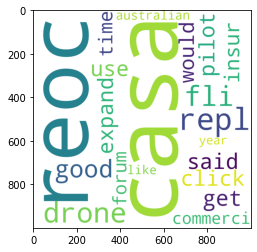

In [46]:
# Top 20 Words in Commercial posts
comm_top20_tuples = most_frequent_words([word for post in dfCommercial.stemmed_text for word in post], 20)
comm_top20_dictionary = convert_tuples_to_dictionary(comm_top20_tuples)
print(comm_top20_dictionary)

# WordCloud for Top 20 Words in Commercial posts
comm_top20_wordcloud = WordCloud(background_color="white", width=1000, height=1000, max_words=20, relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(comm_top20_dictionary)
plt.imshow(comm_top20_wordcloud)

{'fli': 6922, 'drone': 6589, 'said': 2831, 'casa': 2523, 'click': 2415, 'expand': 2389, 'rule': 2357, 'would': 2182, 'use': 1864, 'get': 1790, 'peopl': 1776, 'like': 1764, 'time': 1554, 'flight': 1499, 'know': 1429, 'see': 1411, 'one': 1313, 'go': 1276, 'take': 1178, 'pilot': 1165}


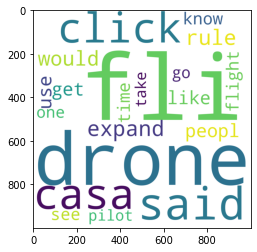

In [47]:
# Top 20 Words in Commercial posts
priv_top20_tuples = most_frequent_words([word for post in dfPrivate.stemmed_text for word in post], 20)
priv_top20_dictionary = convert_tuples_to_dictionary(priv_top20_tuples)
print(priv_top20_dictionary)

# WordCloud for Top 20 Words in Commercial posts
priv_top20_wordcloud = WordCloud(background_color="white", width=1000, height=1000, max_words=20, relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(priv_top20_dictionary)
plt.imshow(priv_top20_wordcloud)